In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv("./files/korea_weather/20230909_Weather.csv")

In [3]:
df.head()

,City ID,City Name,Lon,Lat,Weather ID,Weather Main,Temperature (K),Humidity (%),Visibility (m),Wind Speed (m/s),Clouds (%),Date (Unix),Timezone (s)
0,1832008,Tokusan-ri,128.7000,35.1333,800,Clear,296.23,74,10000,2.44,1,2023-09-09 11:06:29,2023-09-09 20:06:29
1,1832015,Heunghae,129.3522,36.1125,800,Clear,294.17,80,10000,1.34,0,2023-09-09 11:07:12,2023-09-09 20:07:12
2,1832157,Reisui,127.7378,34.7442,800,Clear,296.24,68,10000,1.63,0,2023-09-09 11:09:29,2023-09-09 20:09:29
3,1832215,Yeonil,129.3450,35.9942,800,Clear,293.76,80,10000,1.24,0,2023-09-09 11:09:29,2023-09-09 20:09:29
4,1832257,Neietsu,128.4682,37.1845,800,Clear,290.21,86,10000,1.17,2,2023-09-09 11:09:30,2023-09-09 20:09:30


In [9]:
col = ['Lon', 'Lat', 'Weather ID', 'Temperature (K)', 'Humidity (%)', 'Visibility (m)', 'Wind Speed (m/s)', 'Clouds (%)']

<Axes: >

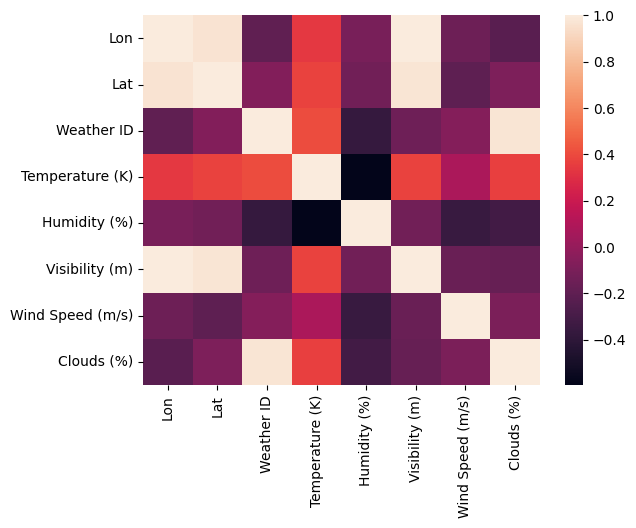

In [10]:
sns.heatmap(df[col].corr())

/Users/jeong/miniforge3/envs/spotify/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeong/miniforge3/envs/spotify/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeong/miniforge3/envs/spotify/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='City Name', ylabel='Temperature (K)'>

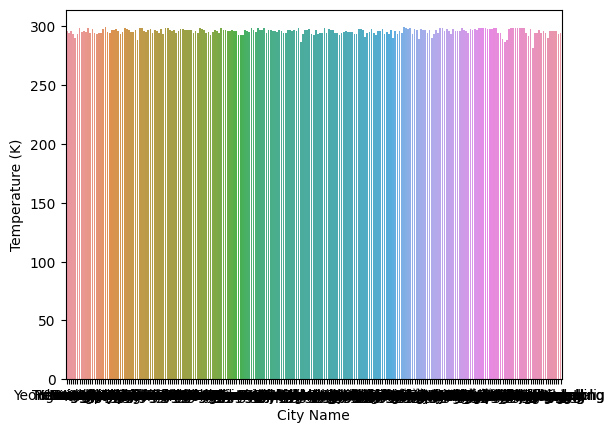

In [13]:
sns.barplot(data = df, x = 'City Name', y = 'Temperature (K)')

## 한국 지도로 날씨 분포 확인

In [22]:
# 온도(K)를 섭씨(C)로 변환하는 함수
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

In [23]:
# 한국 지도 생성 Lat = 위도, Lon = 경도, °C
m = folium.Map(location=[36.5, 127.5], zoom_start=6)

In [24]:
# 온도에 따른 색상 함수 정의
def temperature_color(temperature):
    if temperature < 0:
        return 'blue'
    elif temperature < 10:
        return 'purple'
    elif temperature < 20:
        return 'green'
    elif temperature < 30:
        return 'orange'
    else:
        return 'red'

In [25]:
# 데이터프레임을 이용하여 도시 위치와 온도에 따른 원 추가
for index, row in df.iterrows():
    celsius_temp = kelvin_to_celsius(row["Temperature (K)"])
    color = temperature_color(celsius_temp)
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=10,
        popup=f"{row['City Name']} - 온도: {celsius_temp:.2f}°C",
        color=color,
        fill=True,
        fill_color="blue",
    ).add_to(m)

# 지도를 HTML 파일로 저장
m.save("korea_weather_map.html")

# 지도를 화면에 표시
m